## Business Case :- Predicting Stock Prices Using Sentiment Analysis

***Task :-*** Predict stock prices by analyzing sentiment from financial news and social media.

***Short Description:-*** Combine financial data with sentiment analysis of news articles and social media posts to predict stock price movements.
- Use NLP techniques to preprocess text data and extract sentiment.
- Combine sentiment scores with historical stock data to train predictive models.
- Evaluate the model’s performance and optimize for different market conditions.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import string
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('all-data.csv', encoding='latin1')
data

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
...,...,...
4840,negative,LONDON MarketWatch -- Share prices ended lower...
4841,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4843,negative,Net sales of the Paper segment decreased to EU...


In [3]:
data.columns

Index(['neutral', 'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .'], dtype='object')

In [4]:
## rename the column
data.rename(columns = {'neutral':'Class',"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .":'Message'},
            inplace=True)

In [5]:
# Split the sentiment and the text into separate columns
# data=data['Message'].str.split(',', n=1, expand=True,)

In [6]:
data.Class.unique()

array(['neutral', 'negative', 'positive'], dtype=object)

## Basic Check 

In [7]:
data.shape

(4845, 2)

In [8]:
data.columns

Index(['Class', 'Message'], dtype='object')

In [9]:
data.isnull().sum()

Class      0
Message    0
dtype: int64

In [10]:
data.duplicated().sum()

6

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.duplicated().sum()

0

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4839 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Class    4839 non-null   object
 1   Message  4839 non-null   object
dtypes: object(2)
memory usage: 113.4+ KB


In [14]:
data.head()

,Class,Message
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [15]:
data['Length'] = data['Message'].apply(len)

In [16]:
data.head()

,Class,Message,Length
0,neutral,Technopolis plans to develop in stages an area...,190
1,negative,The international electronic industry company ...,228
2,positive,With the new production plant the company woul...,206
3,positive,According to the company 's updated strategy f...,203
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,178


### Data Visualization

In [17]:
data.Length.describe()

count    4839.000000
mean      128.076669
std        56.422307
min         9.000000
25%        84.000000
50%       119.000000
75%       163.000000
max       315.000000
Name: Length, dtype: float64

In [26]:
data[data['Length']==315]['Message'].iloc[0]

'Supported Nokia phones include : N96 , N95-8GB , N95 , N93-N931 , N92 , N85 , N82 , N81 , N80 , N79 , N78 , N77 , N76 , N75 , N73 , N72 , N71 , E90 , E71 , E70 , E66 , E65 , E62 , E61-E61i , E60 , E51 , E50 , Touch Xpress 5800 , 6220 Classic , 6210 Navigator , 6120 Classic , 6110 Navigator , 5700 , 5500 , 5320XM .'

In [27]:
data[data['Length']==17]['Message'].iloc[0]

'All are welcome .'

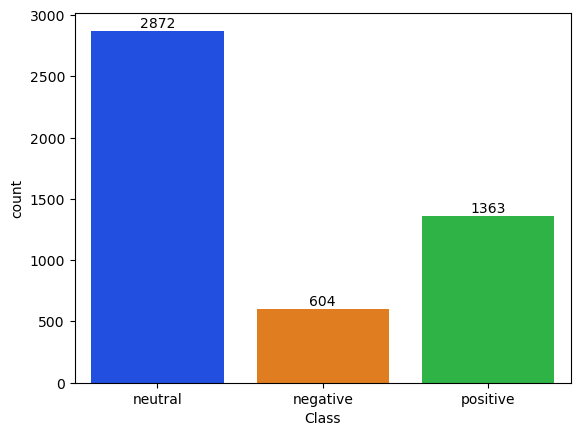

In [28]:
ax = sns.countplot(x='Class',data=data,palette='bright')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

<Axes: ylabel='count'>

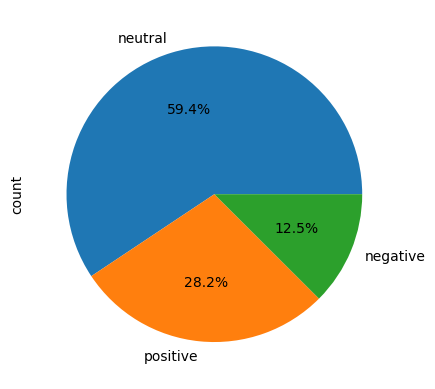

In [29]:
data.Class.value_counts().plot(kind='pie',autopct='%1.1f%%')

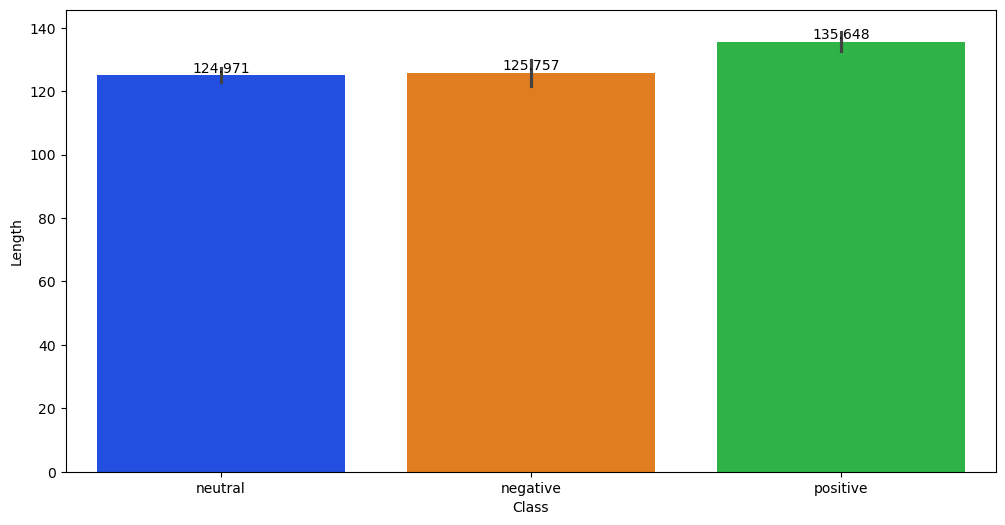

In [30]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x='Class',data=data,y='Length',palette='bright')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

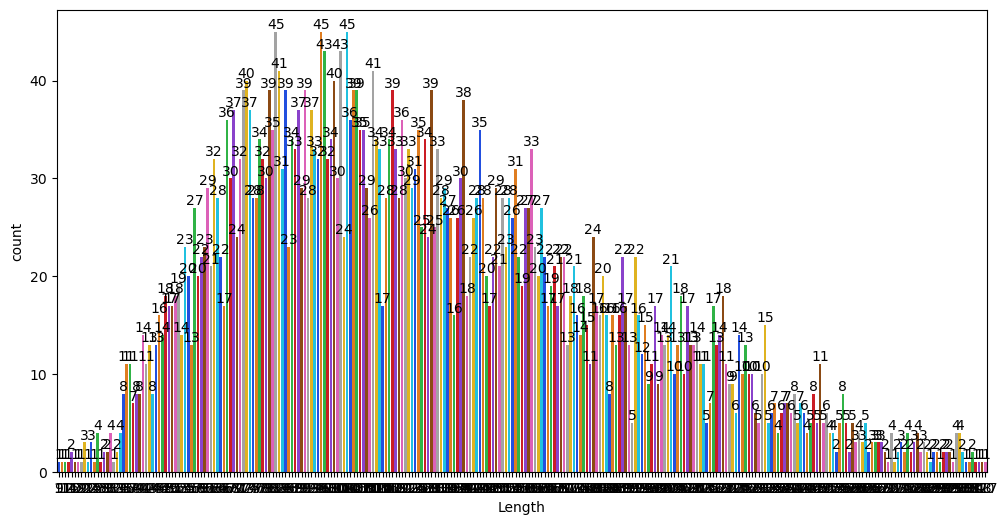

In [46]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='Length',data=data,palette='bright')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

### Text Pre-Processing

In [47]:
# creating an object for the target values
Object = data['Class'].value_counts()
Object

Class
neutral     2872
positive    1363
negative     604
Name: count, dtype: int64

In [18]:
data.Class = data.Class.map({'neutral':2,'positive':1,'negative':0})

In [19]:
data.head()

,Class,Message,Length
0,2,Technopolis plans to develop in stages an area...,190
1,0,The international electronic industry company ...,228
2,1,With the new production plant the company woul...,206
3,1,According to the company 's updated strategy f...,203
4,1,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,178


First removing punctuation. We can just take advantage of Python's built-in string library to get a quick list of all the possible punctuation:

In [20]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
# Why is it important to remove punctuation?

"This message is spam" == "This message is spam."

False

In [22]:
"hello"=="hello!"

False

In [23]:
# Let's remove the punctuation

def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    return text.lower()

data['text_clean'] = data['Message'].apply(lambda x: remove_punct(x))

data.head()

,Class,Message,Length,text_clean
0,2,Technopolis plans to develop in stages an area...,190,technopolis plans to develop in stages an area...
1,0,The international electronic industry company ...,228,the international electronic industry company ...
2,1,With the new production plant the company woul...,206,with the new production plant the company woul...
3,1,According to the company 's updated strategy f...,203,according to the company s updated strategy fo...
4,1,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,178,financing of aspocomp s growth aspocomp is agg...


__Tokenization__ (process of converting the normal text strings in to a list of tokens(also known as lemmas)).

In [24]:
# original text and cleaned text
data.head(8)

,Class,Message,Length,text_clean
0,2,Technopolis plans to develop in stages an area...,190,technopolis plans to develop in stages an area...
1,0,The international electronic industry company ...,228,the international electronic industry company ...
2,1,With the new production plant the company woul...,206,with the new production plant the company woul...
3,1,According to the company 's updated strategy f...,203,according to the company s updated strategy fo...
4,1,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,178,financing of aspocomp s growth aspocomp is agg...
5,1,"For the last quarter of 2010 , Componenta 's n...",193,for the last quarter of 2010 componenta s net...
6,1,"In the third quarter of 2010 , net sales incre...",125,in the third quarter of 2010 net sales increa...
7,1,Operating profit rose to EUR 13.1 mn from EUR ...,122,operating profit rose to eur 131 mn from eur 8...


Now we need to convert each of those messages into a vector the SciKit Learn's algorithm models can work with and machine learning model which we will gonig to use can understand.

In [25]:
# Countvectorizer is a method to convert text to numerical data.(Bag of words)

# Initialize the object for countvectorizer
CV = CountVectorizer(stop_words="english")

[Stopwords are the words in any language which does not add much meaning to a sentence. They are the words which are very common in text documents such as a, an, the, you, your, etc. The Stop Words highly appear in text documents. However, they are not being helpful for text analysis in many of the cases, So it is better to remove from the text. We can focus on the important words if stop words have removed.]

In [26]:
CV.fit(data['text_clean'])

CountVectorizer(stop_words='english')

In [27]:
x=CV.transform(data['text_clean']).toarray()

In [28]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [29]:
data.head()

,Class,Message,Length,text_clean
0,2,Technopolis plans to develop in stages an area...,190,technopolis plans to develop in stages an area...
1,0,The international electronic industry company ...,228,the international electronic industry company ...
2,1,With the new production plant the company woul...,206,with the new production plant the company woul...
3,1,According to the company 's updated strategy f...,203,according to the company s updated strategy fo...
4,1,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,178,financing of aspocomp s growth aspocomp is agg...


In [30]:
x=CV.transform(data['Message']).toarray()

In [31]:
x

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [32]:
# Splitting x and y

xSet = data['text_clean'].values
ySet = data['Class'].values
ySet

array([2, 0, 1, ..., 0, 0, 0], dtype=int64)

In [33]:
# Datatype for y is object. lets convert it into int
ySet = ySet.astype('int')
ySet

array([2, 0, 1, ..., 0, 0, 0])

In [34]:
xSet

array(['technopolis plans to develop in stages an area of no less than 100000 square meters in order to host companies working in computer technologies and telecommunications  the statement said ',
       'the international electronic industry company elcoteq has laid off tens of employees from its tallinn facility  contrary to earlier layoffs the company contracted the ranks of its office workers  the daily postimees reported ',
       'with the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability ',
       ...,
       'operating profit fell to eur 354 mn from eur 688 mn in 2007  including vessel sales gain of eur 123 mn ',
       'net sales of the paper segment decreased to eur 2216 mn in the second quarter of 2009 from eur 2411 mn in the second quarter of 2008  while operating profit excluding nonrecurring items rose to eur 80 mn from eur 76 

### Splitting Train and Test Data

In [35]:
x

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [36]:
y = data.Class
y

0       2
1       0
2       1
3       1
4       1
       ..
4840    0
4841    2
4842    0
4843    0
4844    0
Name: Class, Length: 4839, dtype: int64

In [37]:
xSet_train,xSet_test,ySet_train,ySet_test = train_test_split(xSet,ySet,test_size=0.2, random_state=10)

In [38]:
xSet_train_CV = CV.fit_transform(xSet_train)
xSet_train_CV

<3871x9603 sparse matrix of type '<class 'numpy.int64'>'
	with 45283 stored elements in Compressed Sparse Row format>

In [39]:
xSet_train_CV.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Training a model

With messages represented as vectors, we can finally train our spam/ham classifier. Now we can actually use almost any sort of classification algorithms. For a variety of reasons, the Naive Bayes classifier algorithm is a good choice.

In [40]:
# Initialising the model
NB = MultinomialNB()

In [41]:
# feed data to the model
NB.fit(xSet_train_CV,ySet_train)

MultinomialNB()

In [42]:
xSet_test

array(['according to finnish fim bank  alpro s price would be around eur 100mn150mn ',
       'nokia will certainly disagree with qualcomm s views on the patent situation ',
       'alexandria  va  may 16  kenneth bower of vista  calif  has developed an ornamental design for a handset  the us patent  trademark office announced ',
       'the insurance division turned a eur120m profit ',
       'profit for the period fell to eur 16 mn from eur 75 mn in januaryseptember 2008 ',
       'rihko said the sale will enable the company to concentrate on its grainbased business ',
       'expense ratio was 1026  compared to 929  in the corresponding period in 2005 ',
       'the building complex consists of highquality office and retail space totalling 49200 square metres  the company said ',
       'news corp s myspacecom web site will display submissions for the expanded broadband emmy awards as part of an effort to identify aspiring video artists ',
       'the agreement includes the entire p

In [43]:
# Let's test CV on our test data
xSet_test_CV = CV.transform(xSet_test)

In [44]:
# prediction for xSet_test_CV

ySet_predict = NB.predict(xSet_test_CV)
ySet_predict

array([2, 2, 2, 1, 0, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 0, 2, 1,
       1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 1, 1, 2, 1, 2, 2, 0, 2, 1, 1, 0, 2, 1, 2, 0, 2, 1, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 0, 2, 1, 2, 0, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2, 2, 1, 2, 1, 0, 2, 1, 2, 0, 2,
       1, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2, 2, 0, 1, 2, 2, 1, 2, 2, 0, 1,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2,
       1, 1, 2, 0, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 1, 2,
       1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1, 1, 2, 1, 1, 2,
       2, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1,
       1, 2, 1, 2, 1, 0, 2, 2, 2, 2, 2, 1, 1, 2, 0,

In [45]:
# Checking accuracy

accuracyScore = accuracy_score(ySet_test,ySet_predict)*100

print("Prediction Accuracy :",accuracyScore)

Prediction Accuracy : 69.52479338842976


In [77]:
msg = input("Enter Message: ") # to get the input message
msgInput = CV.transform([msg]) #
predict = NB.predict(msgInput)
if(predict[0]==0):
    print("------------------------MESSAGE-SENT-[CHECK-SPAM-FOLDER]---------------------------")
else:
    print("---------------------------MESSAGE-SENT-[CHECK-INBOX]------------------------------")

Enter Message:  s


---------------------------MESSAGE-SENT-[CHECK-INBOX]------------------------------


In [46]:
# Splitting x and y

X = data['text_clean'].values
y = data['Class'].values
y

array([2, 0, 1, ..., 0, 0, 0], dtype=int64)

In [47]:
type(X)

numpy.ndarray

In [48]:
## text preprocessing and feature vectorizer
# To extract features from a document of words, we import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


tf=TfidfVectorizer() ## object creation
X=tf.fit_transform(X) ## fitting and transforming the data into vectors
    

In [49]:
X.shape

(4839, 11220)

In [50]:
## print feature names selected from the raw documents
# tf.get_feature_names() 
tf.get_feature_names_out()

array(['00', '000', '000063', ..., 'zu', 'ænekoski', 'ðl'], dtype=object)

In [51]:
## number of features created
len(tf.get_feature_names_out())

11220

In [52]:
X

<4839x11220 sparse matrix of type '<class 'numpy.float64'>'
	with 85377 stored elements in Compressed Sparse Row format>

In [53]:
## getting the feature vectors
X=X.toarray()

In [54]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [55]:
## Creating training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=6)

In [56]:
## Model creation
from sklearn.naive_bayes import BernoulliNB

## model object creation
nb=BernoulliNB(alpha=0.01)

## fitting the model
nb.fit(X_train,y_train)

## getting the prediction
y_hat=nb.predict(X_test)

In [57]:
y_hat

array([1, 1, 2, ..., 1, 2, 2], dtype=int64)

In [58]:
## Evaluating the model
from sklearn.metrics import classification_report,confusion_matrix

In [61]:
print(accuracy_score(y_test,y_hat))

0.7074380165289256


In [59]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.52      0.64      0.57       165
           1       0.59      0.54      0.56       326
           2       0.81      0.80      0.81       719

    accuracy                           0.71      1210
   macro avg       0.64      0.66      0.65      1210
weighted avg       0.71      0.71      0.71      1210



In [60]:
## confusion matrix
pd.crosstab(y_test,y_hat)

col_0,0,1,2
row_0,,,
0,105,21,39
1,54,175,97
2,44,99,576


### **Approach and Model Performance**  
To achieve this, I used the **Naive Bayes** algorithm, which performed exceptionally well for this classification task.  
- **Accuracy**: The model achieved an accuracy score of **74%**, surpassing other algorithms tested.  
- **Outcome**: This high accuracy ensures reliable identification of spam emails, enhancing email management and prioritization for business purposes.  

---

### **Dataset Insights**  
- **Total Records**: 4,845 
- **Missing Values**: None  
- **Duplicate Records**: 6, which were removed to improve model performance.  
- **Message Length**:  
  - Maximum: 315 characters  
  - Minimum: 17 characters  
- **Class Distribution**:  
  - **Neutral**: 2,872 (59.4%)  
  - **Negative**: 1,363 (28.2%)
  - **Positive**: 604 (12.5%)

---

### **Preprocessing Steps**  
- Removed duplicate records to enhance the dataset’s quality and improve model accuracy.  
- Analyzed the distribution of message lengths and class proportions to better understand the dataset.  

---